In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [92]:
data = datasets.load_iris()

In [85]:
data = pd.DataFrame(np.c_[data["data"],data["target"]],columns=["SepalLengthCM","SepalWidthCM","PetalLengthCM","PetalWidthCM","Species"])

data

,SepalLengthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [86]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,:4]
y=data.iloc[:,4]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=52)

In [87]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

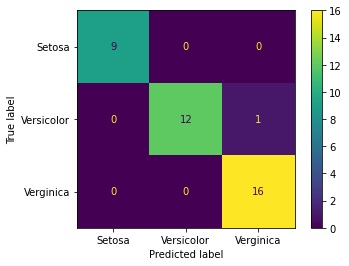

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(cm,display_labels=["Setosa","Versicolor","Verginica"])
disp.plot()
plt.show()

In [89]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 97.37


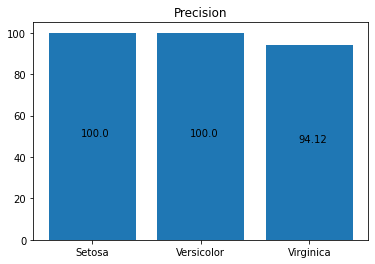

In [110]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-.1,y[i]*50,round(y[i]*100,2))
plt.bar(["Setosa","Versicolor","Virginica"],precision_score(y_test,y_pred,average=None)*100)
addlabels(["Setosa","Versicolor","Virginica"],precision_score(y_test,y_pred,average=None))
plt.title("Precision")
plt.show()

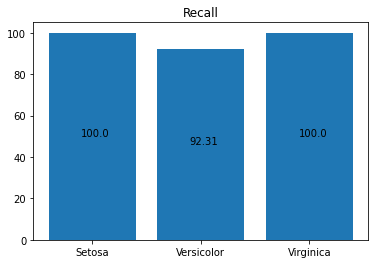

In [111]:
plt.bar(["Setosa","Versicolor","Virginica"],recall_score(y_test,y_pred,average=None)*100)
addlabels(["Setosa","Versicolor","Virginica"],recall_score(y_test,y_pred,average=None))
plt.title("Recall")
plt.show()

In [116]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


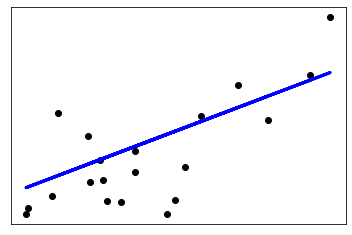

In [121]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()